In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
CWD = os.getcwd()
def create_dir(DIrectory_Name):
    if not os.path.exists(DIrectory_Name):
        os.makedirs(DIrectory_Name)
    return ('Directory Created')

#Create Directory
create_dir(CWD+'/'+'INPUT_Images')
INPATH = CWD+'/'+'INPUT_Images/'

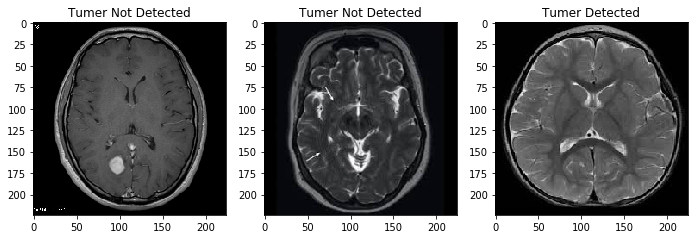

In [3]:
IMG_SIZE = 224
loaded_model = tf.keras.models.load_model('keras_model.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)
batch_holder = np.zeros((len(os.listdir(INPATH)), IMG_SIZE, IMG_SIZE, 3))
img_dir=INPATH
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
  batch_holder[i, :] = img
result=loaded_model.predict_classes(batch_holder)
#print(result)
fig = plt.figure(figsize=(20, 20))
 
for i,img in enumerate(batch_holder):
    fig.add_subplot(4,5, i+1)
    if result[i]==0:
        plt.title('Tumer Detected')
        plt.imshow(img/256.)
    else:
        plt.title('Tumer Not Detected')
        plt.imshow(img/256.)

plt.show()    